In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#!pip install -U scikit-learn scipy matplotlib pandas numpy

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f61586e22d0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3893, in atexit_operations
    self._atexit_once()
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3872, in _atexit_once
    self.reset(new_session=False)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 1375, in reset
    self.history_manager.reset(new_session)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/history.py", line 607, in reset
    self.dir_hist[:] = [Path.cwd()]
                        ^^^^^^^^^^
  File "/usr/lib/python3.11/pathlib.py", line 908, in cwd
    return cls(os.getcwd())
               ^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory


In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y=True)
print ("Digits number: {}".format(X.shape))
pd.DataFrame(y).value_counts()



Digits number: (1797, 64)


3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

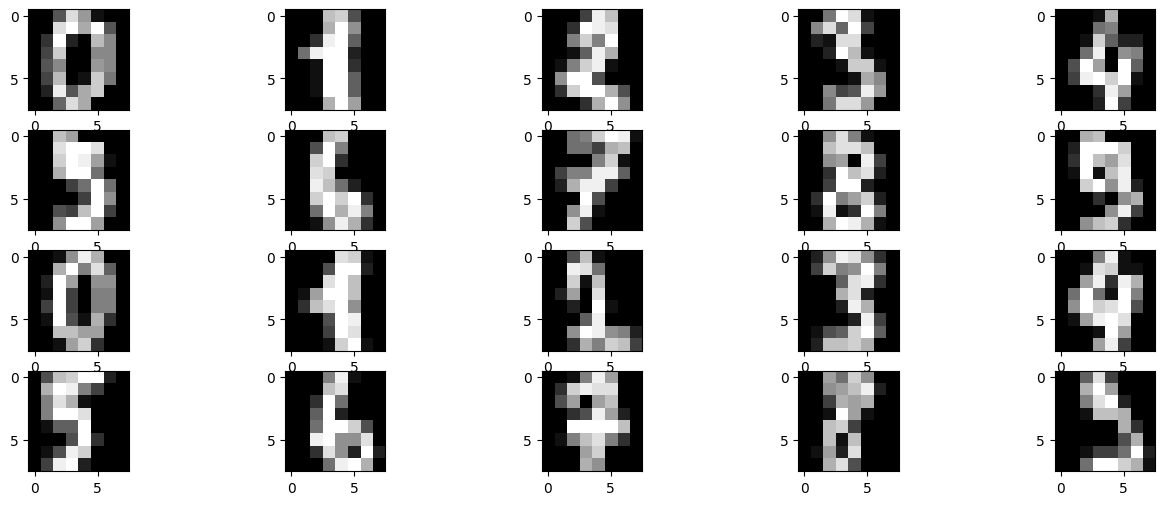

In [8]:
plt.figure(figsize=(16,6))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i,:].reshape([8,8]),cmap='gray')
    

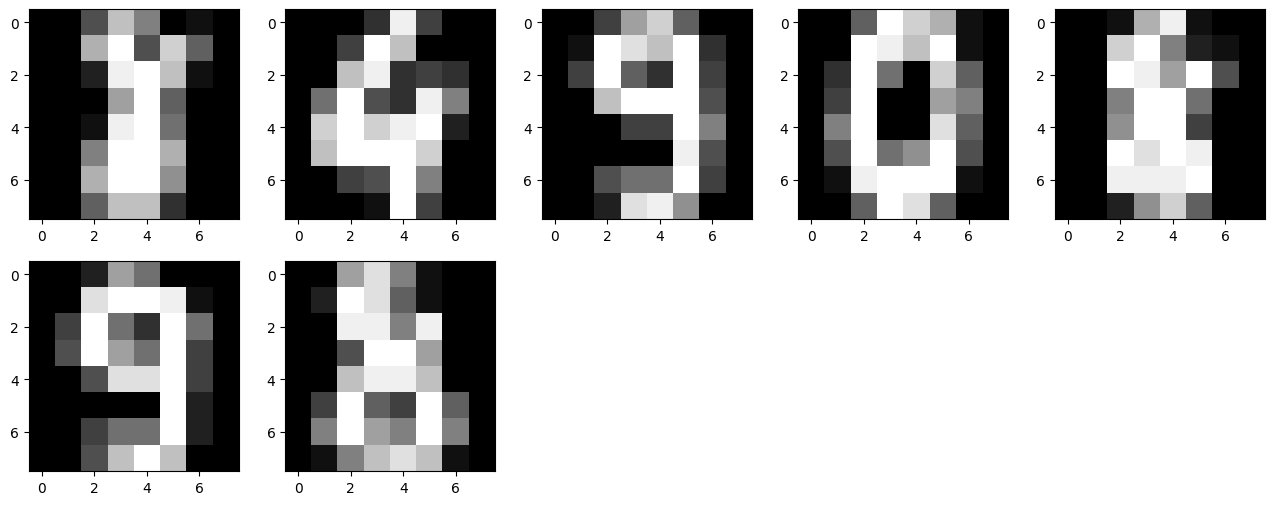

In [9]:
plt.figure(figsize=(16,6))
for i in range(1790,1797):
    plt.subplot(2,5,i+1-1790)
    plt.imshow(X[i,:].reshape([8,8]),cmap='gray')

In [10]:
# Let's make the encoding from value to the probability vector
def to_one_hot(Y):
    n_columns = np.max(Y) + 1
    n_strokes = len(Y)
    binarized = np.zeros((n_strokes,n_columns))
    for n_stroke in range(n_strokes) :
        binarized[n_stroke][Y[n_stroke]] = 1
    return binarized

def analyze_prediction(Y_matrix,threshold=0.5):
    n_strokes = Y_matrix.shape[0]
    y_vector = np.zeros(n_strokes);
    for stroke in range(0,n_strokes):
        maxi = np.max(Y_matrix[stroke])
        if maxi >= threshold :
            y_vector[stroke]+=np.argmax(Y_matrix[stroke])
    return y_vector;

def calc_accuracy(y_test,y_valid):
    acc=0;
    for i in range(0,len(y_test)):
        if y_test[i]==y_valid[i]: acc=acc+1;
    acc = acc/len(y_test);
    return acc



In [11]:
# The input data:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#y = y.flatten()
y_scaled = to_one_hot(y)
display(y_scaled,y_scaled.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [12]:
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [13]:
y_scaled

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y_scaled, test_size=0.6)
print ("X_train.shape = {}".format(X_train.shape))
print ("X_test.shape = {}".format(X_test.shape))
print ("Y_train.shape = {}".format(Y_train.shape))
print ("Y_test.shape = {}".format(Y_test.shape))


X_train.shape = (718, 64)
X_test.shape = (1079, 64)
Y_train.shape = (718, 10)
Y_test.shape = (1079, 10)


In [15]:
def sigmoid (x):
    return 1 / (1+np.exp(-x));

def deriv_sigmoid (x):
    return sigmoid(x) * (1-sigmoid(x));


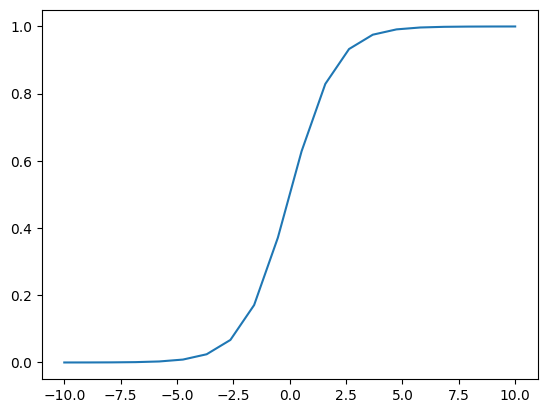

In [16]:
x=np.linspace(-10,10,20)
y=sigmoid(x)
plt.plot(x,y)

In [17]:

neuron_numb = 70

M1 = X_train.shape[1]
N1 = neuron_numb
M2 = N1
N2 = Y_train.shape[1]

learning_rate = 0.001
num_epochs = 20000
errors = []
metrics = []

np.random.seed(1)

w0 = learning_rate*np.random.random((M1,N1))
w1 = learning_rate*np.random.random((M2,N2))


def nn_with_2_layers (X_matrix):
    etta0 = np.dot(X_matrix,w0)
    y0 = sigmoid(etta0)
    etta1 = np.dot(y0,w1)
    y1 = sigmoid(etta1)
    return (etta0,y0,etta1,y1)


for i in range (num_epochs) :
    
    # Neural network activity:-----------------------------------------
    etta0,y0,etta1,y1 = nn_with_2_layers(X_matrix=X_train);
    #print ("Max 0 ",np.max(etta0),"Max 1 ",np.max(etta1))
    
    # Error:-----------------------------------------------------------
    e1 = y1 - Y_train
    de1 = e1*deriv_sigmoid(etta1)
    de_pack1 = y0.T.dot(de1)
    
    e0 = de1.dot(w1.T)
    de0 = e0*deriv_sigmoid(etta0)
    de_pack0 = X_train.T.dot(de0)
    
    # Correcting:------------------------------------------------------
    w1 -= de_pack1 * learning_rate
    w0 -= de_pack0 * learning_rate
    
    # Error stat:------------------------------------------------------
    etta0,y0,etta1,y1 = nn_with_2_layers(X_train)

    e = np.abs(de_pack1).sum()
    errors.append(e)
    
    # print("--------------------------------------------")
    # print(Y_train)
    # print(y1)
    # print(e)
    
    predictions = analyze_prediction(y1)
    labels = np.argmax(Y_train,axis=1)
    accur = calc_accuracy(y_test=predictions,y_valid=labels)
    # print (predictions) print (labels)
    metrics.append(accur);
    

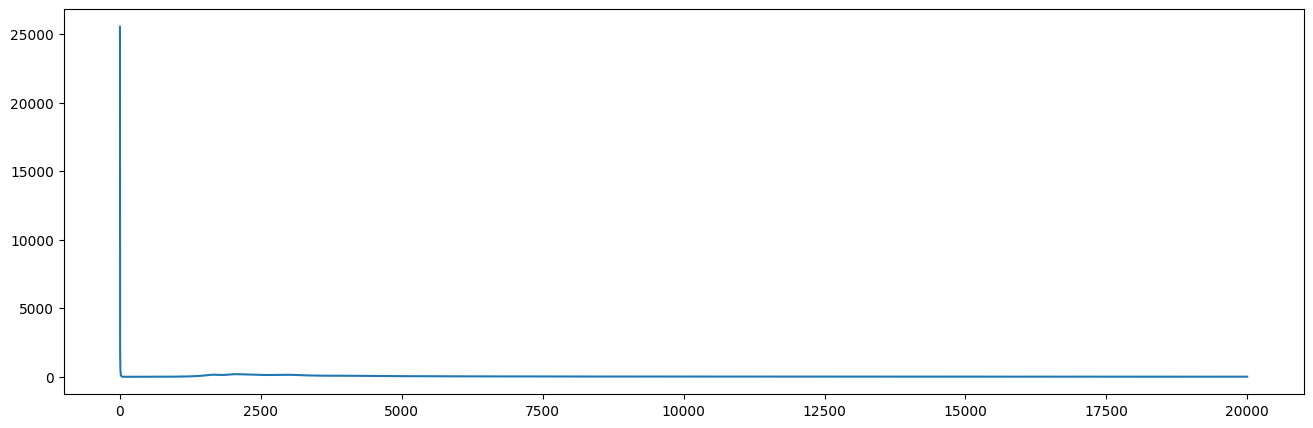

In [18]:
plt.figure(figsize=(16,5))
plt.plot(errors)

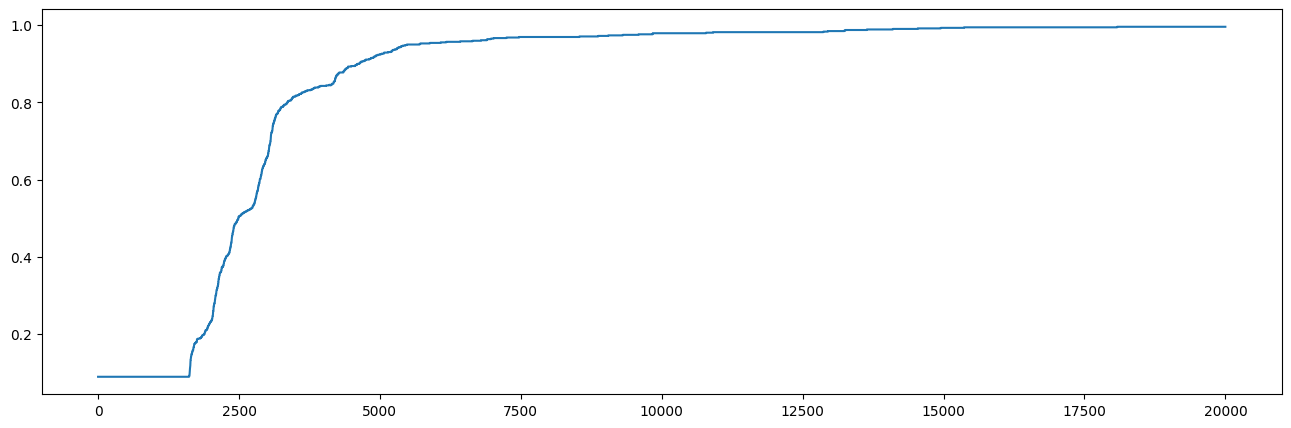

In [19]:
plt.figure(figsize=(16,5))
plt.plot(metrics)

In [20]:
def make_prediction_2_layers (X_test_matrix,Y_test_matrix):
    e0,y0,e1,Y_predict_matrix = nn_with_2_layers(X_test_matrix)
    predictions = analyze_prediction(Y_predict_matrix)
    labels = np.argmax(Y_test_matrix,axis=1)
    accur = calc_accuracy(y_test=predictions,y_valid=labels)
    return accur;

a = make_prediction_2_layers (X_test,Y_test)
a

0.9314179796107507

In [21]:
np.max(metrics)

0.9958217270194986

Выводы:
1) Реализован пакетный способ обучения. Он не самый быстрый зато лучше уклабывается в тензорную модель Numpy</br>
2) В исходных материалах не было указан уровень начальных значений весов и коэффициентов. Из спец. литературы известно что это весомый параметр, особенно в задачах классификации. С одной стороны он влияет на скорость обучения с другой на стабильность</br>
3) Коэффициент скорости обучения или шаг влияет на стабильности и скорость обучения точно также как и величина коэффициентов</br>
4) Рассмотренная модель упрощена. В ней нехватает пороговых коэффициентов для соответствия стандартной модели формального нейрона Маккалока-Пиитса</br>
5) Рассмотренная модель не имеет моментов обучения и регуляризаций</br>
6) Рассмотренная модель не имеет средств нейронной хирургии для оптимизации связей
7) Количество элементов (слои и нейроны) сети влияет на ее память и обобщающую силу. С одной стороны это может приводить к переобучению, если много - с другой стороны к увеличению скорости прохождения стадий обучения и быстрому запоминанию примеров со старта. Большие сети долго раскачиваются, но качественно работают на тесте. Маленькие сети быстро запоминают, но на тесте не так хороши. Поиска параметров размерности сети - это один из примеров задач на оптимизацию алгоритма либо по решетке, либо случайным поиском (стохастическая оптимизация) 

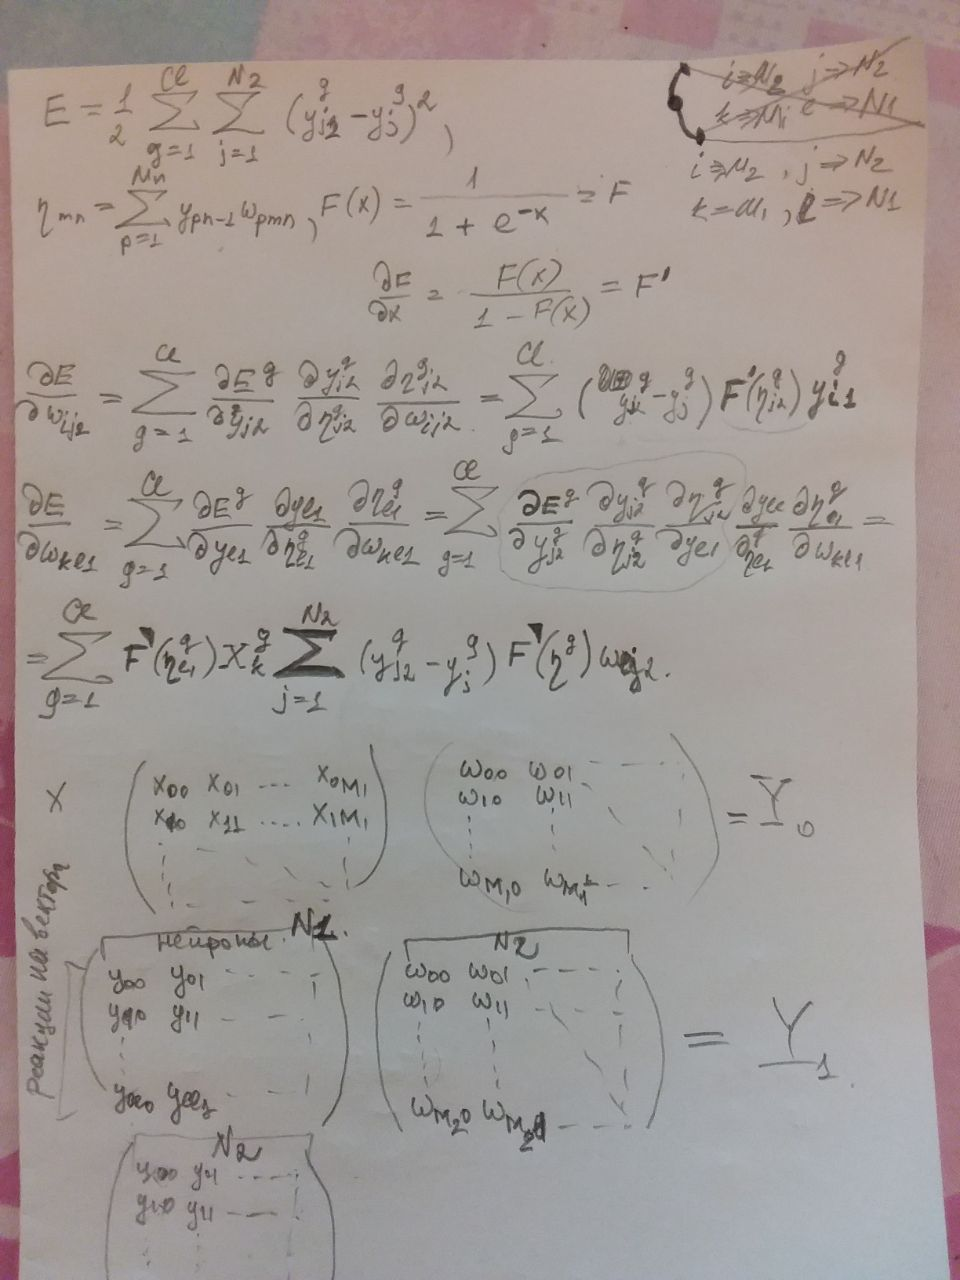